<a href="https://colab.research.google.com/github/derek-shing/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [17]:
#Loading Data
import pandas as pd

col = ['age', 'year_operation', 'nodes_detected','survival']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data' ,header=None, names = col)

df.head()

,age,year_operation,nodes_detected,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [18]:
#Validate that you have no missing values.

df.isnull().sum()


age               0
year_operation    0
nodes_detected    0
survival          0
dtype: int64

In [19]:
#Adding name to feature is done in step 1

#Try to change the encoding to 0/1 in survival class

df
newcode = {2:0,1:1}
df.survival = df.survival.map(newcode)


#Print the first 5 row 
df.head()
df

,age,year_operation,nodes_detected,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [26]:
# TODO
#We care about survival status most, so the first table will be the cross relation between those variable and survival

#Create bin for age_group and year_operation

df.year_operation.value_counts()
df.age.value_counts()

df['age_bins'] = pd.cut(df.age,5)
df

pd.crosstab(df.survival,df.age_bins)

age_bins,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
survival,,,,,
0,4,31,27,16,3
1,39,68,69,43,6


In [27]:

pd.crosstab(df.survival,df.nodes_detected)

nodes_detected,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
survival,,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,...,1,1,3,1,0,0,0,1,0,1
1,117,33,15,13,10,2,4,5,5,2,...,0,2,0,0,1,1,1,0,1,0


In [30]:
# The 2 table will be the stattistical summary of the data

df.describe()

,age,year_operation,nodes_detected,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [31]:
df.corr()

,age,year_operation,nodes_detected,survival
age,1.000000,0.089529,-0.063176,-0.067950
year_operation,0.089529,1.000000,-0.003764,0.004768
nodes_detected,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


Text(0,0.5,'Survival more than 5 year')

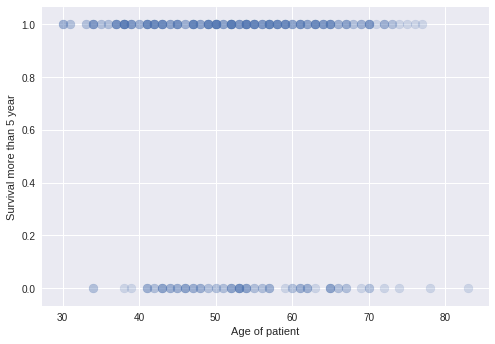

In [43]:
#Try to plot the relationship age and survival status

import matplotlib.pyplot as plt

plt.scatter(df.age,df.survival, s=80, alpha=0.2)
plt.xlabel('Age of patient')
plt.ylabel('Survival more than 5 year')



Text(0.5,1,'Survival Status on different age goup')

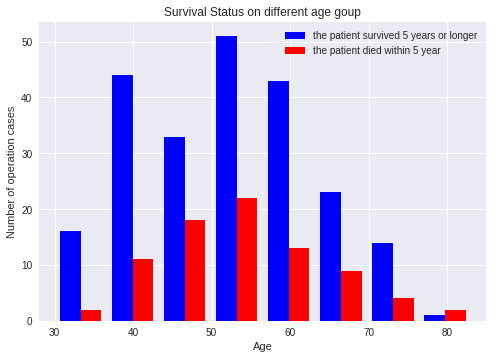

In [46]:
# Make a separate list for different survival status
survival = list(df[df.survival==1]['age'])
die = list(df[df.survival==0]['age'])


# Assign colors for each survival status and the names
colors = ['b', 'r',]
names = ['the patient survived 5 years or longer','the patient died within 5 year']

plt.hist([survival,die], bins = 8,
         color = colors, label=names)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of operation cases')
plt.title('Survival Status on different age goup')

Text(0,0.5,'Number of cases')

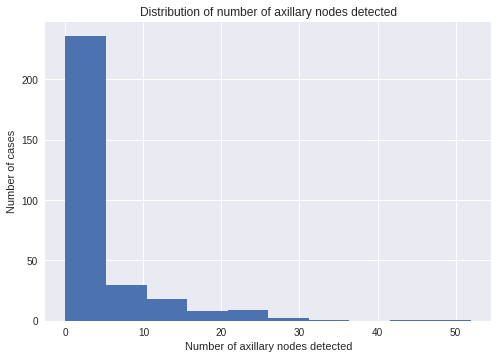

In [39]:
#Try to plot the distribution of number of axillary nodes detected

plt.hist(df.nodes_detected)
plt.title('Distribution of number of axillary nodes detected')
plt.xlabel('Number of axillary nodes detected')
plt.ylabel('Number of cases')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

The year of operation

- What is at least one feature that looks to have a negative relationship with survival?

Age of patient and Number of positive axillary nodes detected


- How are those two features related with each other, and what might that mean?

The age is positively related to the year of operation. That mean 'the year of operation' may be a confounding variable that will influences both age and survival status.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.